In [189]:
#import essential libraries
import matplotlib.pyplot as plt
import numpy as np
import math
import random
import time
import sys
from sklearn.metrics import silhouette_score

K-means Algorithm
1.   Initialize K centroids randomly within the dataspace
2.   Assign each datapoint in the input dataset to the closest centroid
1.   Update the centroids by computing the mean of all the datapoints assigned to each centroid
2.   Repeat steps 2 and 3 until convergence or after a maximum number of iterations.





In [190]:
def euclidean_distance(pointInX, centroid_given):
    # Calculate the Euclidean distance between a data point and a centroid
    euclidean_distance = math.sqrt(sum([(a - b) ** 2 for a, b in zip(pointInX, centroid_given)]))
    return euclidean_distance

def closestCentroid(x, centroids):
    # Assign each data point to the closest centroid
    assignments = []
    for point in x:
        distance = []
        for centroid in centroids:
            distance.append(euclidean_distance(point, centroid))
        min_distance = min(distance)
        index_min_dist = distance.index(min_distance)
        assignments.append(index_min_dist)
    assignments = np.array(assignments)
    return assignments 

def update_centroids(x, assigns, k):
    # Update the centroids based on the mean of the assigned data points
    new_centroids = []
    for i in range(k):
        cluster_points = X[assigns==i]
        if len(cluster_points) == 0:
            # If a cluster has no points assigned to it, randomly initialize a new centroid
            new_centroid = initialize_centroids(1)[0]  
        elif len(cluster_points) != 0:
            new_centroid = np.mean(cluster_points, axis=0)
        new_centroids.append(new_centroid)
    return new_centroids

def initialize_centroids(k):
    # Randomly initialize k centroids
    centroids = []
    for i in range(k):
        centroid = []
        for j in range(len(X[0])):
            centroid.append(random.uniform(np.min(X[:,j]), np.max(X[:,j])))
        centroids.append(centroid)
    return centroids

def kmeans(x, k, max_iter = 100, conv_iter = 5):
  start_time = time.time()
  n_points = len(x)
  if k > n_points:
    raise ValueError("The number of clusters, k cannot be greater than the number of datapoints.")
  
  #initialize random centroids
  centroids = initialize_centroids(k)

  print('Initialized centroids: {}'.format(centroids))
  prev_centroids = []
  for i in range(max_iter):
      clusters = closestCentroid(x, centroids)
      new_centroids = update_centroids(x, clusters, k)
      print('Iteration: {}, New Centroids: {}, Old Centroids: {}'.format(i+1, new_centroids, centroids))
      # print(f"{type(centroids)}")
      if np.allclose(new_centroids, centroids):
        conv_iter -= 1
        if conv_iter == 0:
          break
      centroids = new_centroids
  end_time = time.time()
  time_elapsed = end_time - start_time

  # Calculate space complexity
  space_assignments = sys.getsizeof(clusters)
  space_data_points = sys.getsizeof(x)
  space_centroids = sys.getsizeof(initialize_centroids(k))
  total_space = space_assignments + space_data_points + space_centroids
  
  # Calculate the silhouette score
  silhouette_avg = silhouette_score(X, clusters)
  return clusters, time_elapsed, total_space, silhouette_avg



In [191]:
#initialize input toy dataset
X = np.array([[2, 4],
              [1.7, 2.8],
              [7, 8],
              [8.6, 8],
              [3.4, 1.5],
              [9,11]])

# Specify the number of clusters
K = 2

# Perform k-means clustering on the data
assignments, time_elapsed, total_space, silhouette_avg = kmeans(X, K)
print(f"Time complexity: {time_elapsed} seconds")
print(f"Space complexity: {total_space} bytes")
print(f"Silhouette score: {silhouette_avg}")


Initialized centroids: [[2.139621384747824, 4.351758948390994], [7.1400307380953345, 1.9978558415896046]]
Iteration: 1, New Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])], Old Centroids: [[2.139621384747824, 4.351758948390994], [7.1400307380953345, 1.9978558415896046]]
Iteration: 2, New Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])], Old Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])]
Iteration: 3, New Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])], Old Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])]
Iteration: 4, New Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])], Old Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])]
Iteration: 5, New Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])], Old Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])]
Iteration: 6, New Centroids: [array([2.36666667, 2.76666667]), array([8.2, 9. ])], Old Centroids: [array([2.3

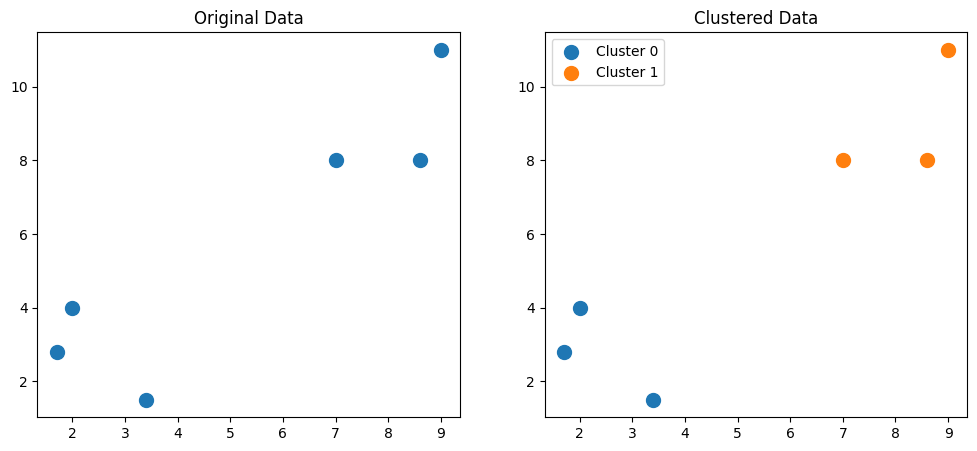

In [192]:
def visualize(input, kmeans_assignments, K):
    assert len(input) == len(kmeans_assignments), "Dimensions of input and kmeans_assignments must match."

    # Create a 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the original data
    axes[0].scatter(input[:, 0], input[:, 1], s=100)
    axes[0].set_title("Original Data")

    # Plot the clustered data
    unique_labels = np.unique(kmeans_assignments)
    colors = [plt.cm.tab10(i % K) for i in range(K)]

    for i in range(K):
        axes[1].scatter(input[kmeans_assignments == i, 0], input[kmeans_assignments == i, 1], color=colors[i], label=f"Cluster {i}", s=100)

    axes[1].set_title("Clustered Data")
    axes[1].legend()

    # Display both subplots side by side
    plt.show()

visualize(X, assignments, K)



Test Cases

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Initialized centroids: [[2.578073969388988, 134.34114526675035, 16.94649156301007], [221.11299291811952, 175.00561317111448, 189.19823345376443], [170.59693288620144, 1.6379806930271474, 10.50035487576413]]
Iteration: 1, New Centroids: [array([  0. ,  64. , 127.5]), array([255. , 223.5, 101.5]), array([200.75,  51.75,  42.5 ])], Old Centroids: [[2.578073969388988, 134.34114526675035, 16.94649156301007], [221.11299291811952, 175.00561317111448, 189.19823345376443], [170.59693288620144, 1.6379806930271474, 10.50035487576413]]
Iteration: 2, New Centroids: [array([  0. ,  64. , 127.5]), array([255.        , 204.        ,  67.66666667]), array([182.66666667,  14.        ,  56.66666667])], Old Centroids: [array([  0. ,  64. , 127.5]), array([255. , 223.5, 101.5]), array([200.75,  51.75,  42.5 ])]
Iteration: 3, New Centroids: [array([  0. ,  64. , 127.5]), array([255.        , 204.        ,  67.

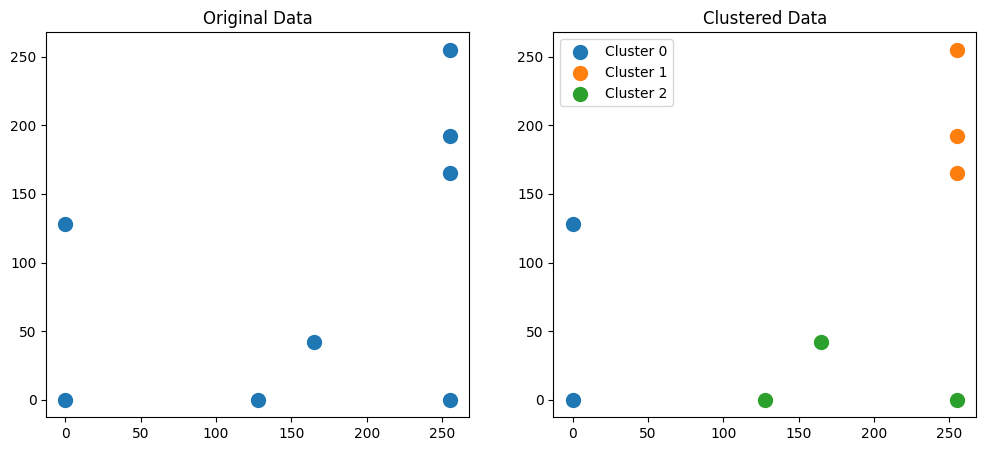

In [193]:
# Define the colors to cluster
!pip install webcolors
import webcolors
from matplotlib import style
colors = ['red', 'green', 'blue', 'purple', 'yellow', 'pink', 'orange', 'brown']

# Convert color names to RGB values
rgb_colors = []
for color in colors:
    try:
        rgb_color = webcolors.name_to_rgb(color)
        rgb_colors.append(rgb_color)
    except ValueError:
        pass

# Convert list of RGB values to numpy array
X = np.array(rgb_colors)
K = 3
assignments, time_elapsed, total_space, silhouette_avg = kmeans(X, K)
print(f"Time complexity: {time_elapsed} seconds")
print(f"Space complexity: {total_space} bytes")
print(f"Silhouette score: {silhouette_avg}")
visualize(X, assignments, K)


Initialized centroids: [[4.687159163734063, 3.6415661802369446, 2.346043189209432], [4.373679140091237, 8.177607815711003, 4.4821621863853505], [4.578335161997798, 6.670622059553904, 5.193294961218339]]
Iteration: 1, New Centroids: [array([1.5, 1.5, 1.5]), [2.0337842827359482, 8.28313918035176, 4.552994689295721], array([7., 7., 7.])], Old Centroids: [[4.687159163734063, 3.6415661802369446, 2.346043189209432], [4.373679140091237, 8.177607815711003, 4.4821621863853505], [4.578335161997798, 6.670622059553904, 5.193294961218339]]
Iteration: 2, New Centroids: [array([1.5, 1.5, 1.5]), [7.314701913802873, 4.111001040177953, 7.454768150565536], array([7., 7., 7.])], Old Centroids: [array([1.5, 1.5, 1.5]), [2.0337842827359482, 8.28313918035176, 4.552994689295721], array([7., 7., 7.])]
Iteration: 3, New Centroids: [array([1.5, 1.5, 1.5]), array([6., 5., 6.]), array([7.14285714, 7.28571429, 7.14285714])], Old Centroids: [array([1.5, 1.5, 1.5]), [7.314701913802873, 4.111001040177953, 7.4547681505

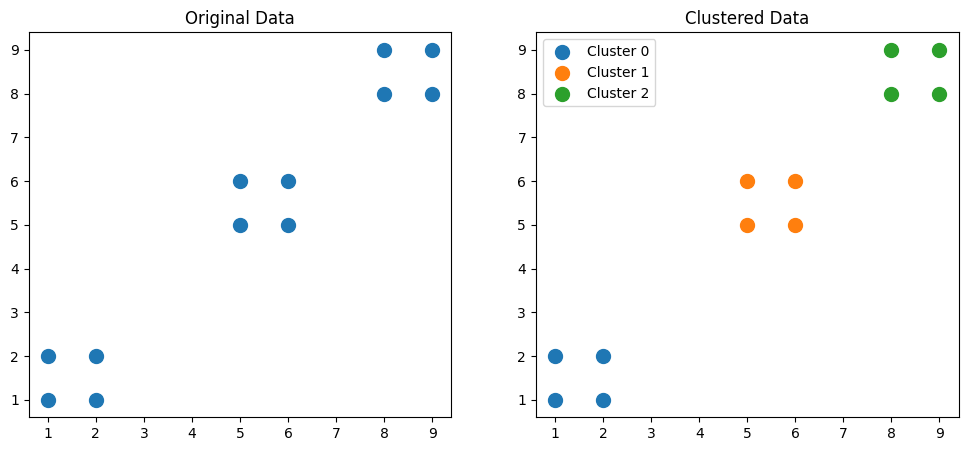

In [194]:
#spherical clusters
X = np.array([[1, 1, 1],
               [1, 2, 1],
               [2, 1, 2],
               [2, 2, 2],
               [8, 8, 8],
               [8, 9, 8],
               [9, 8, 9],
               [9, 9, 9],
               [5, 5, 5],
               [5, 6, 5],
               [6, 5, 6],
               [6, 6, 6]])

K = 3
assignments, time_elapsed, total_space, silhouette_avg = kmeans(X, K)
print(f"Time complexity: {time_elapsed} seconds")
print(f"Space complexity: {total_space} bytes")
print(f"Silhouette score: {silhouette_avg}")
visualize(X, assignments, K)

Initialized centroids: [[2.4940469481712677, 1.4559238399960277, 6.104589025824821, 2.386990918699751], [5.886239009948204, 5.900053983129838, 6.639389685919494, 5.09694920489145]]
Iteration: 1, New Centroids: [array([1.5, 1.5, 1.5, 1.5]), array([8.5, 8.5, 8.5, 8.5])], Old Centroids: [[2.4940469481712677, 1.4559238399960277, 6.104589025824821, 2.386990918699751], [5.886239009948204, 5.900053983129838, 6.639389685919494, 5.09694920489145]]
Iteration: 2, New Centroids: [array([1.5, 1.5, 1.5, 1.5]), array([8.5, 8.5, 8.5, 8.5])], Old Centroids: [array([1.5, 1.5, 1.5, 1.5]), array([8.5, 8.5, 8.5, 8.5])]
Iteration: 3, New Centroids: [array([1.5, 1.5, 1.5, 1.5]), array([8.5, 8.5, 8.5, 8.5])], Old Centroids: [array([1.5, 1.5, 1.5, 1.5]), array([8.5, 8.5, 8.5, 8.5])]
Iteration: 4, New Centroids: [array([1.5, 1.5, 1.5, 1.5]), array([8.5, 8.5, 8.5, 8.5])], Old Centroids: [array([1.5, 1.5, 1.5, 1.5]), array([8.5, 8.5, 8.5, 8.5])]
Iteration: 5, New Centroids: [array([1.5, 1.5, 1.5, 1.5]), array([8.

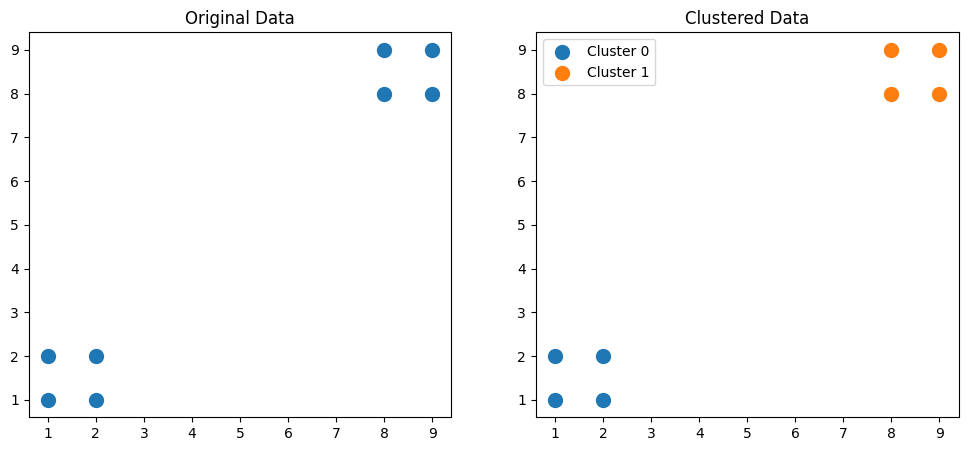

In [195]:
#4-D data
X = np.array([[1, 1, 1, 1],
               [1, 2, 1, 2],
               [2, 1, 2, 1],
               [2, 2, 2, 2],
               [8, 8, 8, 8],
               [8, 9, 8, 9],
               [9, 8, 9, 8],
               [9, 9, 9, 9]])
K = 2
assignments, time_elapsed, total_space, silhouette_avg = kmeans(X, K)
print(f"Time complexity: {time_elapsed} seconds")
print(f"Space complexity: {total_space} bytes")
print(f"Silhouette score: {silhouette_avg}")
visualize(X, assignments, K)

Initialized centroids: [[12.46144959356279, 12.586564258696114, 6.458043790940111], [6.025709274706304, 9.151458391580887, 1.4296115144026154], [2.7412041957554374, -0.7121608027612182, 0.7065598139742353]]
Iteration: 1, New Centroids: [array([8.77451315, 8.24622667, 8.8945667 ]), array([5.6760399 , 6.15587098, 5.81192716]), array([1.34612272, 1.17223924, 1.32774996])], Old Centroids: [[12.46144959356279, 12.586564258696114, 6.458043790940111], [6.025709274706304, 9.151458391580887, 1.4296115144026154], [2.7412041957554374, -0.7121608027612182, 0.7065598139742353]]
Iteration: 2, New Centroids: [array([8.36878237, 7.96519286, 8.65391195]), array([4.93541957, 5.27427223, 5.14652082]), array([0.95661049, 0.85630858, 0.78790003])], Old Centroids: [array([8.77451315, 8.24622667, 8.8945667 ]), array([5.6760399 , 6.15587098, 5.81192716]), array([1.34612272, 1.17223924, 1.32774996])]
Iteration: 3, New Centroids: [array([8.16016185, 7.77499412, 8.40472098]), array([4.33010788, 4.54988664, 4.365

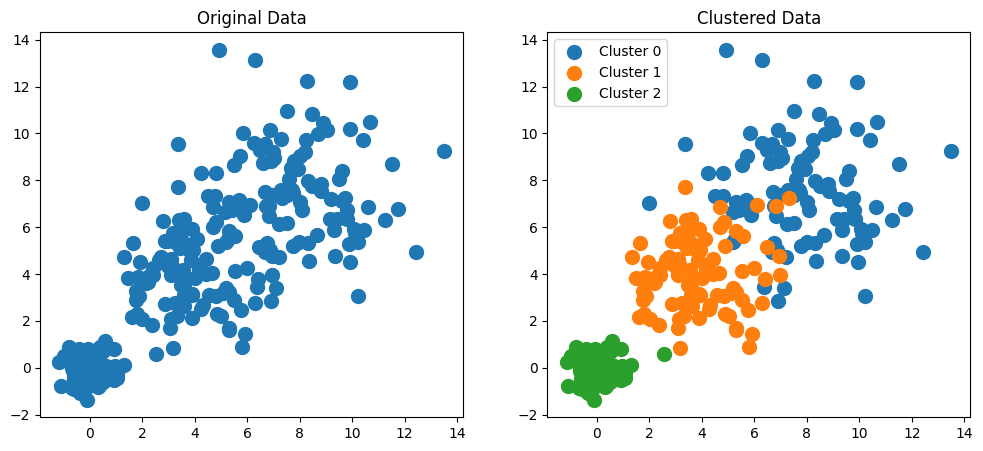

In [196]:
#concentric clusters
X = np.concatenate([
    np.random.randn(100, 3) * 0.5,
    np.random.randn(100, 3) * 1.5 + np.array([4, 4, 4]),
    np.random.randn(100, 3) * 2.0 + np.array([8, 8, 8])
])

K = 3
assignments, time_elapsed, total_space, silhouette_avg = kmeans(X, K)
print(f"Time complexity: {time_elapsed} seconds")
print(f"Space complexity: {total_space} bytes")
print(f"Silhouette score: {silhouette_avg}")
visualize(X, assignments, K)

Initialized centroids: [[2.985188966835287, 0.27803772894553136, 9.827943575564714], [9.176728231039599, 3.3461358356583295, 4.121976713209759], [2.7899004697467817, -0.7443795436362592, -1.374289668309779]]
Iteration: 1, New Centroids: [array([3.38892517, 4.52407854, 6.95145208]), array([6.13279532, 5.76925848, 5.30854848]), array([0.22321578, 0.23704008, 0.24573126])], Old Centroids: [[2.985188966835287, 0.27803772894553136, 9.827943575564714], [9.176728231039599, 3.3461358356583295, 4.121976713209759], [2.7899004697467817, -0.7443795436362592, -1.374289668309779]]
Iteration: 2, New Centroids: [array([3.23529343, 4.07624119, 5.00889395]), array([6.96229907, 6.45572893, 5.66302314]), array([0.16064168, 0.06829359, 0.13865562])], Old Centroids: [array([3.38892517, 4.52407854, 6.95145208]), array([6.13279532, 5.76925848, 5.30854848]), array([0.22321578, 0.23704008, 0.24573126])]
Iteration: 3, New Centroids: [array([3.66150506, 3.92943959, 3.91207632]), array([7.84228039, 7.57942731, 7.1

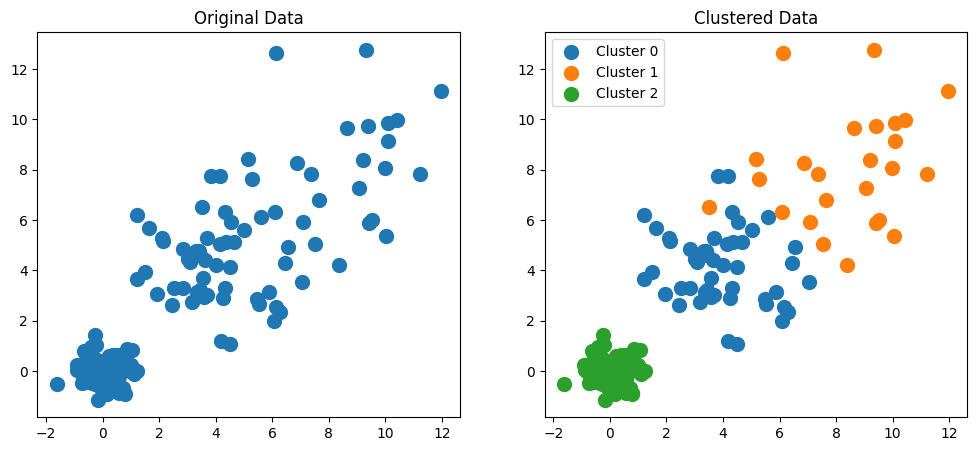

In [197]:
#3D data forming clusters of different cluster densities
X = np.concatenate([
    np.random.randn(100, 3) * 0.5,
    np.random.randn(50, 3) * 1.5 + np.array([4, 4, 4]),
    np.random.randn(25, 3) * 2.0 + np.array([8, 8, 8])
])

K = 3
assignments, time_elapsed, total_space, silhouette_avg = kmeans(X, K)
print(f"Time complexity: {time_elapsed} seconds")
print(f"Space complexity: {total_space} bytes")
print(f"Silhouette score: {silhouette_avg}")
visualize(X, assignments, K)

Initialized centroids: [[-0.25931276305873163, -0.019210239320554767], [1.1804698489490177, -0.5213947678851227]]
Iteration: 1, New Centroids: [array([-0.16213989,  0.53630326]), array([ 1.27528828, -0.07840225])], Old Centroids: [[-0.25931276305873163, -0.019210239320554767], [1.1804698489490177, -0.5213947678851227]]
Iteration: 2, New Centroids: [array([-0.17781484,  0.56084377]), array([ 1.24722077, -0.08611422])], Old Centroids: [array([-0.16213989,  0.53630326]), array([ 1.27528828, -0.07840225])]
Iteration: 3, New Centroids: [array([-0.17781484,  0.56084377]), array([ 1.24722077, -0.08611422])], Old Centroids: [array([-0.17781484,  0.56084377]), array([ 1.24722077, -0.08611422])]
Iteration: 4, New Centroids: [array([-0.17781484,  0.56084377]), array([ 1.24722077, -0.08611422])], Old Centroids: [array([-0.17781484,  0.56084377]), array([ 1.24722077, -0.08611422])]
Iteration: 5, New Centroids: [array([-0.17781484,  0.56084377]), array([ 1.24722077, -0.08611422])], Old Centroids: [a

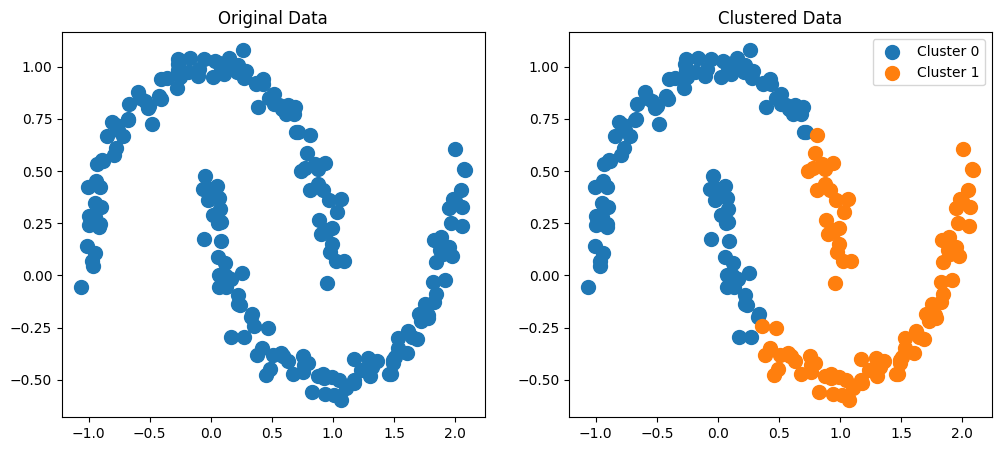

In [198]:
#2D datapoints forming non-convex clusters
from sklearn.datasets import make_moons
X, _ = make_moons(200, noise=0.05)

K = 2
assignments, time_elapsed, total_space, silhouette_avg = kmeans(X, K)
print(f"Time complexity: {time_elapsed} seconds")
print(f"Space complexity: {total_space} bytes")
print(f"Silhouette score: {silhouette_avg}")
visualize(X, assignments, K)

Initialized centroids: [[-0.2720532531567704, 12.657877075447306, 17.31432962008498], [7.489153324579513, 0.8812868724091976, 0.12436911526822736], [0.6911735098424774, 11.91533941312624, 6.494074983924067]]
Iteration: 1, New Centroids: [array([10.38068804,  9.95168283, 14.49878186]), array([3.08357365, 2.21751031, 2.55235423]), array([7.54864227, 9.30526406, 7.7381497 ])], Old Centroids: [[-0.2720532531567704, 12.657877075447306, 17.31432962008498], [7.489153324579513, 0.8812868724091976, 0.12436911526822736], [0.6911735098424774, 11.91533941312624, 6.494074983924067]]
Iteration: 2, New Centroids: [array([11.23304772, 10.11725668, 12.42034611]), array([1.87314533, 1.8156936 , 1.88319541]), array([7.88610312, 8.50275567, 7.28884187])], Old Centroids: [array([10.38068804,  9.95168283, 14.49878186]), array([3.08357365, 2.21751031, 2.55235423]), array([7.54864227, 9.30526406, 7.7381497 ])]
Iteration: 3, New Centroids: [array([10.97572786, 10.16402589, 11.76224647]), array([1.22582928, 1.2

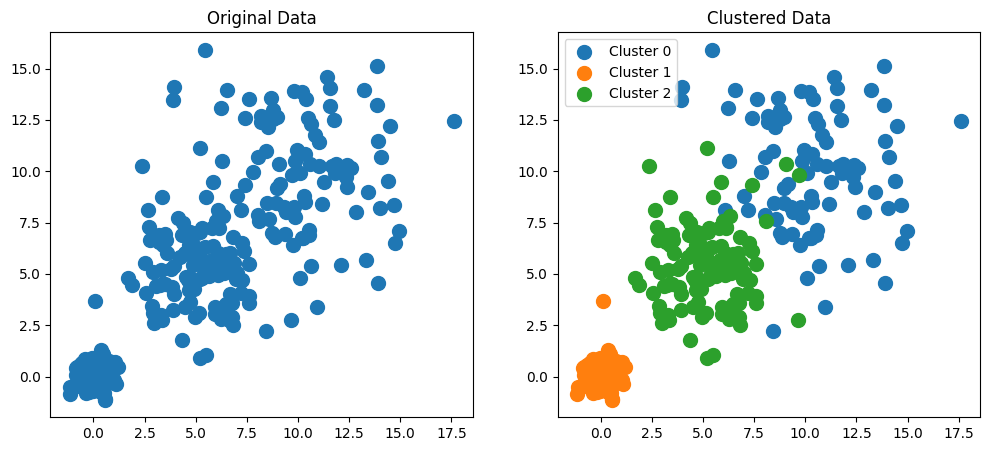

In [199]:
# Test case with three-dimensional data points forming clusters with different variances:
X = np.concatenate([
    np.random.randn(100, 3) * 0.5,
    np.random.randn(100, 3) * 1.5 + np.array([5, 5, 5]),
    np.random.randn(100, 3) * 3.0 + np.array([10, 10, 10])
])

K = 3
assignments, time_elapsed, total_space, silhouette_avg = kmeans(X, K)
print(f"Time complexity: {time_elapsed} seconds")
print(f"Space complexity: {total_space} bytes")
print(f"Silhouette score: {silhouette_avg}")
visualize(X, assignments, K)

Initialized centroids: [[-0.8186482921445785, 0.7861442551932438], [0.9030967020946079, -0.38264425824207804], [-0.16366874249704555, 0.12060013630372945]]
Iteration: 1, New Centroids: [array([-0.61427625,  0.6242733 ]), array([ 0.61398516, -0.27852765]), array([-0.17875698,  0.00789999])], Old Centroids: [[-0.8186482921445785, 0.7861442551932438], [0.9030967020946079, -0.38264425824207804], [-0.16366874249704555, 0.12060013630372945]]
Iteration: 2, New Centroids: [array([-0.44732433,  0.60923063]), array([ 0.57985226, -0.20641491]), array([-0.26344176, -0.11145445])], Old Centroids: [array([-0.61427625,  0.6242733 ]), array([ 0.61398516, -0.27852765]), array([-0.17875698,  0.00789999])]
Iteration: 3, New Centroids: [array([-0.23295913,  0.61129364]), array([ 0.5769493 , -0.12860517]), array([-0.45559886, -0.39803516])], Old Centroids: [array([-0.44732433,  0.60923063]), array([ 0.57985226, -0.20641491]), array([-0.26344176, -0.11145445])]
Iteration: 4, New Centroids: [array([-0.181631

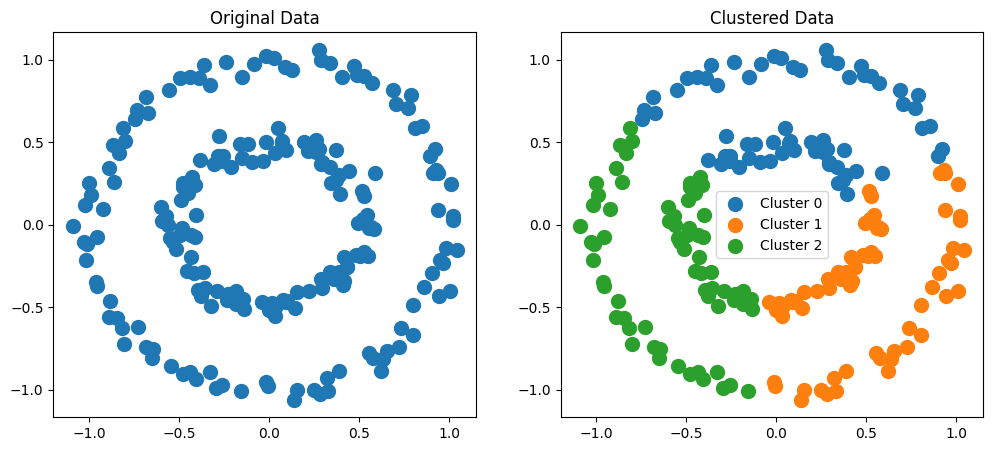

In [200]:
# Test case with two-dimensional data points forming concentric circles:
from sklearn.datasets import make_circles
X, _ = make_circles(200, noise=0.05, factor=0.5)

K = 3
assignments, time_elapsed, total_space, silhouette_avg = kmeans(X, K)
print(f"Time complexity: {time_elapsed} seconds")
print(f"Space complexity: {total_space} bytes")
print(f"Silhouette score: {silhouette_avg}")
visualize(X, assignments, K)

Initialized centroids: [[1.3299970941431294, -5.005185664473542], [-6.028746107711389, -8.283360940720698], [7.309512054573217, -8.740309568247593]]
Iteration: 1, New Centroids: [array([0.55451936, 1.28320012]), array([-7.14150509, -3.44729636]), array([ 8.16608825, -5.37766585])], Old Centroids: [[1.3299970941431294, -5.005185664473542], [-6.028746107711389, -8.283360940720698], [7.309512054573217, -8.740309568247593]]
Iteration: 2, New Centroids: [array([0.42486101, 2.44106865]), array([-6.06303049, -3.26337335]), array([ 6.45722594, -4.82646144])], Old Centroids: [array([0.55451936, 1.28320012]), array([-7.14150509, -3.44729636]), array([ 8.16608825, -5.37766585])]
Iteration: 3, New Centroids: [array([0.24050308, 3.11355503]), array([-5.67326385, -3.29128184]), array([ 5.78524877, -4.39786649])], Old Centroids: [array([0.42486101, 2.44106865]), array([-6.06303049, -3.26337335]), array([ 6.45722594, -4.82646144])]
Iteration: 4, New Centroids: [array([0.28355499, 3.49259144]), array([

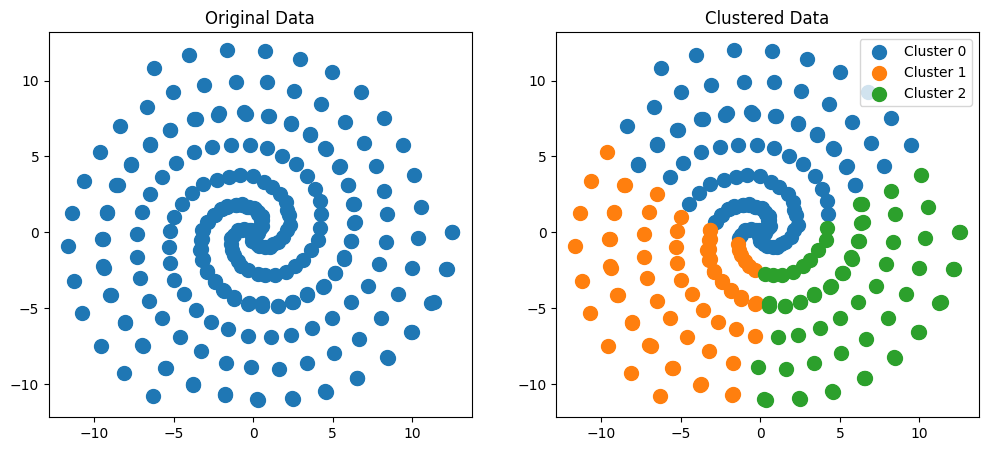

In [201]:
# Test case with two-dimensional data points forming clusters in a spiral pattern:
def generate_spiral_data(n_points, n_spirals=2, noise=0.05):
    t = np.linspace(0, 4 * np.pi, n_points // n_spirals)
    r = t
    x = r * np.cos(t)
    y = r * np.sin(t)
    X = np.column_stack((x, y))

    for i in range(1, n_spirals):
        angle = 2 * np.pi * i / n_spirals
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                    [np.sin(angle), np.cos(angle)]])
        new_points = np.dot(X, rotation_matrix)
        X = np.vstack((X, new_points))

    X += np.random.randn(*X.shape) * noise
    return X

X = generate_spiral_data(200, n_spirals=3)

K = 3
assignments, time_elapsed, total_space, silhouette_avg = kmeans(X, K)
print(f"Time complexity: {time_elapsed} seconds")
print(f"Space complexity: {total_space} bytes")
print(f"Silhouette score: {silhouette_avg}")
visualize(X, assignments, K)